In [1]:
# Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot as plt


## Question 1:

1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)


In [125]:
my_missing = ['NA','NULL','nan']
weather = pd.read_csv('weather.csv', skiprows = 11, na_values=my_missing)
weather.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


In [126]:
weather.dtypes

day          int64
month       object
year         int64
station     object
maxtp      float64
mintp      float64
rain       float64
wdsp       float64
hg         float64
sun        float64
dtype: object

In [127]:
weather.shape

(1095, 10)

In [128]:
print('The data was recorded in the following years : ', weather['year'].unique())

The data was recorded in the following years :  [2021]


As we can see from the above output, the data is only recoreded from one year, 2021. The temporal resolution of the data is 1 day. We can also see that the weather measurements recoreded are : maxtp, mintp, rain, wdsp, hg (atmospheric pressure) and sun. The dataset which is in the form of a dataframe, records the weather measurements from 3 different weather stations across the country, every day over the course of a year. When you include the variables of day, month, year and station, it leaves us with a dataframe of 10 columns and 1095 (365X3) observations/rows.






## Question 2:

2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)

    **Note:** You do not need to implement any of your suggested strategies.

In [129]:
weather.isna().sum()

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

There could be a number of reasons as to why there are missing values in this dataset. These include data entry mistakes and human error, weather measurement malfunction or maybe on days where the weather was particularly extreme, some of the equipment may have been damaged. Missing values can also be a result of administrative/filing errors.

Missing values can be dealt with in a number of ways. One way is data-deletion. This is the deletion of an observation/row in the event that that row contains one or some missing values. This is effective in removing missing values, however it can also lead to a loss of information, and in datasets that contain alot of missing values, this can get rid of a large chunk of the data. Missing values can also be filled in via imputation or by filling these values in with eg. the mean of that column. However, this will centre the values towards the mean. 

For this dataset, I have chosen to leave the missing values in the dataset as it is relatively small and I do not want to incur information loss. The universal notation for a missing value and one that pandas recognises is NaN, however some datasets have these values displayed as nan, NA or NULL. To ensure they are all of the same variable name, I have included: my_missing = ['NA','NULL','nan] in the loading in stage of the process. 


## Question 3:

3. Write code to answer the following questions: (15 marks)

    A. How many different weather stations are included in the data set?


In [130]:
stations=weather['station'].describe()
print('There are ',stations['unique'], ' different weather stations included in the data set')

There are  3  different weather stations included in the data set


    B. At what station and on what date was the lowest minimum air temperature recorded?


In [131]:
min_ind = weather['mintp'].idxmin()
weather.loc[[min_ind], ['day','month','year','station','mintp']]

,day,month,year,station,mintp
8,9,jan,2021,Dublin Airport,-5.9


    C. At what station and on what date was the largest amount of rain recorded?

In [132]:
max_ind = weather['rain'].idxmax()
weather.loc[[max_ind],['day','month','year','station','rain']]

,day,month,year,station,rain
1029,27,oct,2021,Cork Airport,50.1


## Question 4:

4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [133]:
weather_num = weather[['maxtp','mintp','rain','wdsp','hg','sun']]
weather_num.describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


From the above table we are given a number of different numerical summaries about each of the weather measurements in the dataframe. 
The count refers to the number of numerical observations for each of the given measurements. The variation in values in this row is explained by the number of missing values for that given measurement, and can be easily verified by looking back at the missing value counts for each variable. 
The mean simply gives us the average or centre point for each variable. 
The std is the standard deviation, and tells us on average, the variation for each observation for that variable from its mean. 
The min simply shows us the minimum value for that variable, while the max shows the maximum.
The 25%, 50% and 75%  observations refer to the percentiles for each of the variables. For instance, in the case of maxtp, 25% of the values are less than 10.2 degrees, 50% of the values are under 13.4 degrees (which is also the median value), and 75% and maxtp values are range up to 17.6 degrees. 


## Question 5:

5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

Text(0.5, 0, 'Max Temperature')

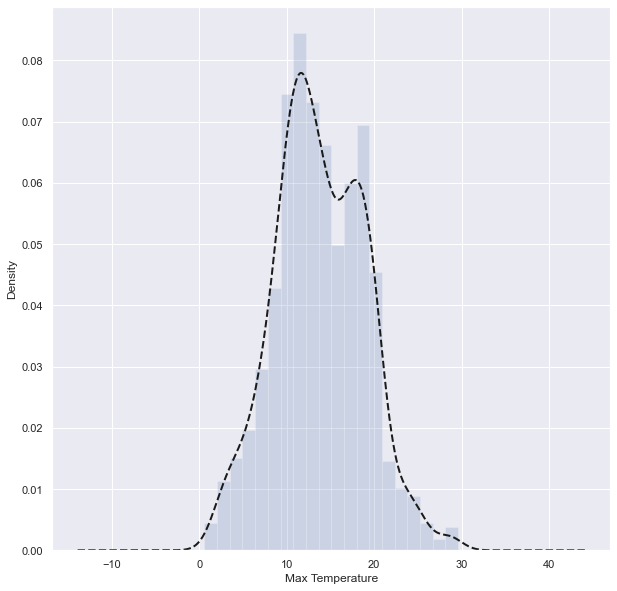

In [134]:
weather.maxtp.hist(bins=20,density=True,color='b',alpha=0.2)
weather.maxtp.plot(kind='kde',style='k--',linewidth=2.0)
plt.xlabel('Max Temperature')

This graph further explains the data obtained in question 4. We can see clearly that the mean lies around 13.73, and that the majority of the data points lie within 5.1 degrees of the mean. 

Text(0.5, 0, 'Min Temperature')

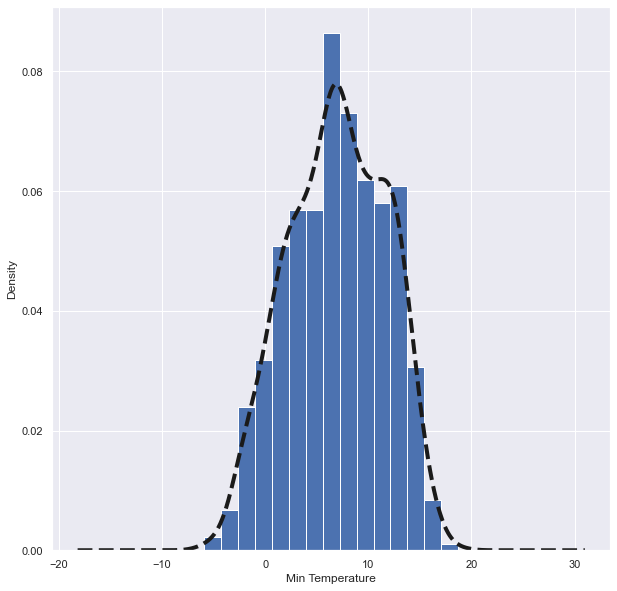

In [135]:
weather.mintp.hist(bins=15,density=True,color='b',alpha=1)
weather.mintp.plot(kind='kde',style='k--',linewidth=4)
plt.xlabel('Min Temperature')

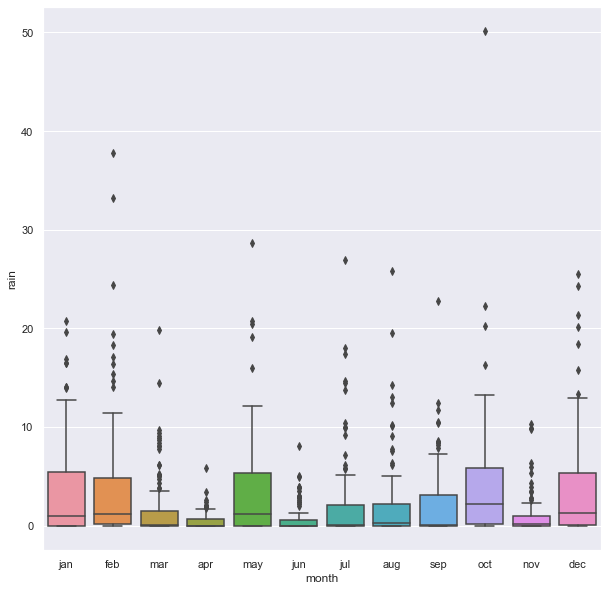

In [136]:
sns.boxplot(x='month', y='rain', data=weather)
plt.show()

Text(0, 0.5, 'hg')

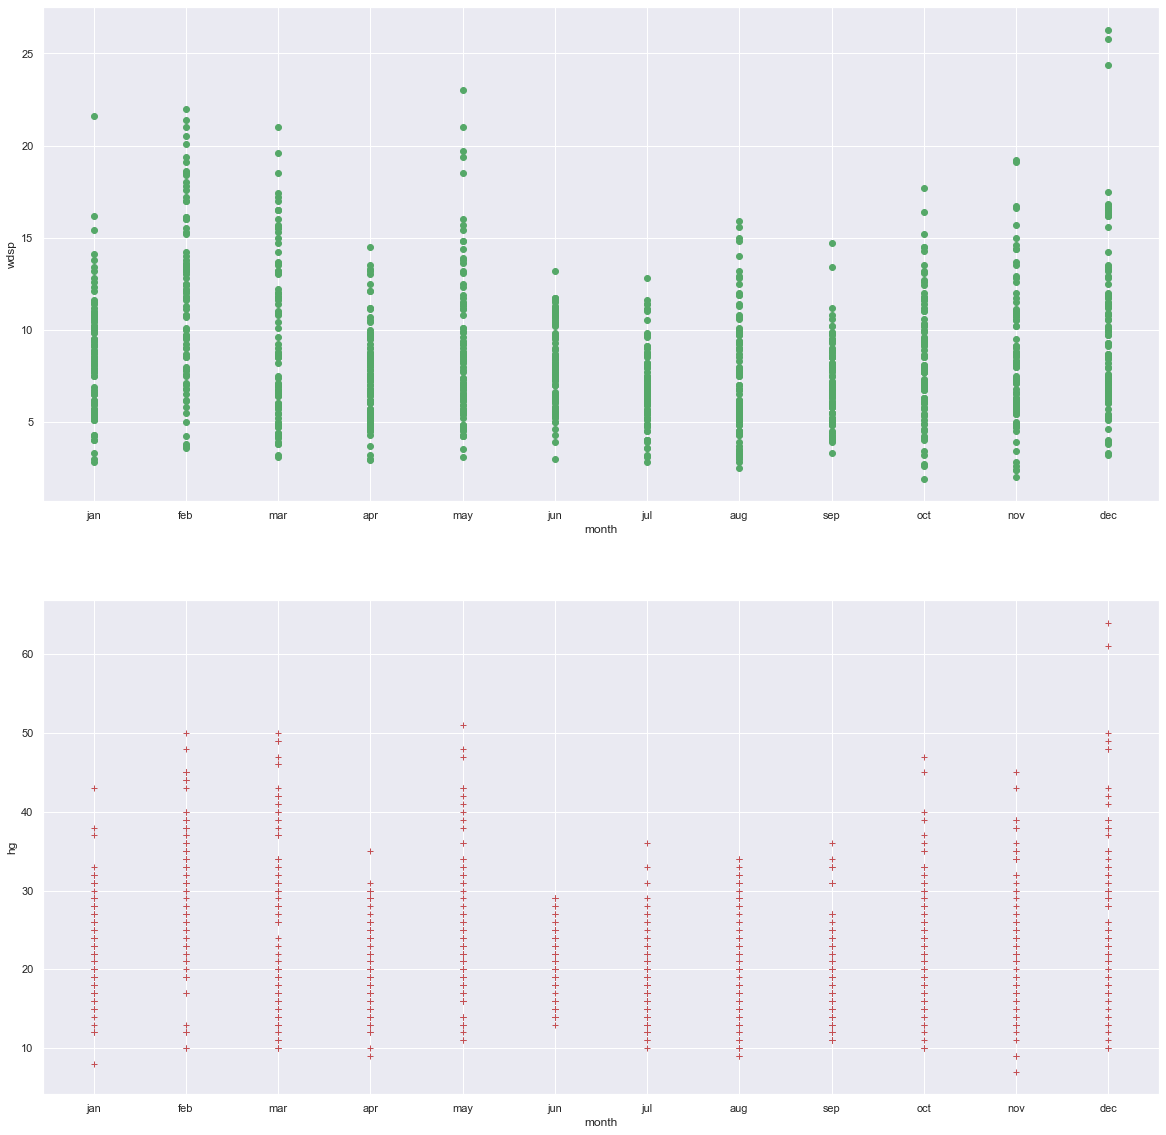

In [137]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(weather.month,weather.wdsp,'go')
plt.xlabel('month')
plt.ylabel('wdsp')
plt.subplot(2,1,2)
plt.plot(weather.month,weather.hg,'r+')
plt.xlabel('month')
plt.ylabel('hg')

I have plotted the two variables, windspeed and High gusts together, due to their corrlation both in the dataset and in nature. As expected, both of these variables express similar results on similar days. Along with this, in both of the datasets, high windspeed and gusts are less frequent in the summer months of june july and august, while highest in winter. 

Text(0.5, 0, 'Hours of Sunshine per day')

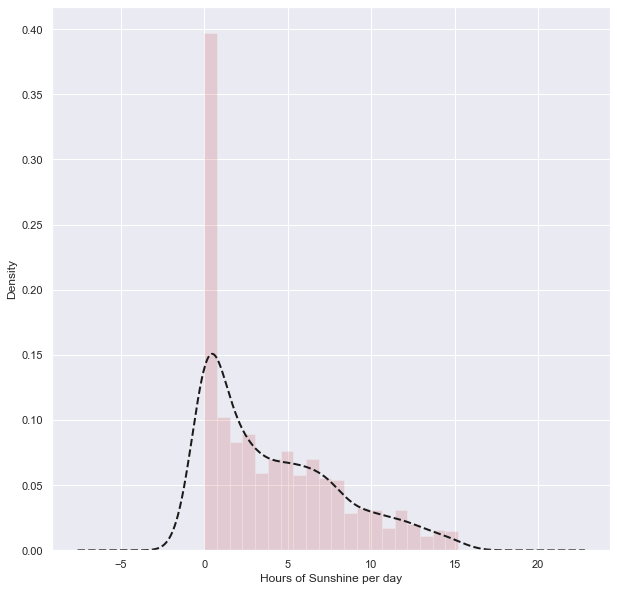

In [138]:
weather.sun.hist(bins=20,density=True,color='r',alpha=0.2)
weather.sun.plot(kind='kde',style='k--',linewidth=2.0)
plt.xlabel('Hours of Sunshine per day')

This lines up with the numerical data obtained from question 4. In the previous data we observe that 75% of the data is within 6.6 hours. This graphical summary shows us that for the majority of days, there was little to no hours of sunshine.

## Question 6:

6. Produce a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. Interpret your plot. (8 marks)

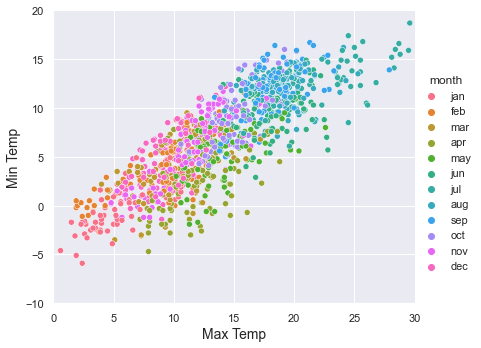

In [139]:
sns.relplot(x="maxtp", y="mintp", data=weather, hue='month',height = 4.7, aspect = 1.2)
plt.axis([0,30,-10,20])
plt.xlabel('Max Temp',fontsize=14)
plt.ylabel('Min Temp',fontsize=14);

This plot clearly represents the positive correlation between the two variables maxtp and mintp. This relationship is quite intuitive, and the colour coding by month makes it even easier to interpret. If you look at the data moving from left to right, it is firstly clear that the lower temperatures (both mintp and maxtp) recorded represent the colder months of the year; january, february, march, december and novemeber (datapoints on the left side). 
As you move to the right, the temperature measurements on both axes increase, which lines up to their colour corresponding months; April, may, June, July and August. The trend here is very evident and correlates to weather trends in Ireland when broken down by month. 
From this plot we can also conclude that the warmest days were in the month of July while the coldest in January.

## Question 7:

7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the first few rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [140]:
weather['temp_range'] = weather['maxtp'] - weather['mintp']
weather.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_range
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


## Question 8:

8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. Interpret your plot. (8 marks)

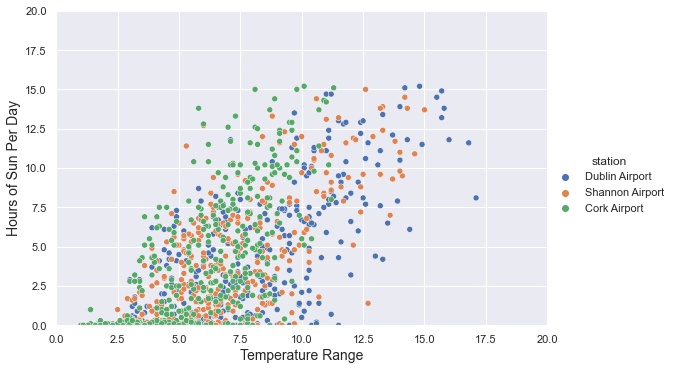

In [141]:
sns.relplot(x="temp_range", y="sun", data=weather, hue='station',aspect = 1.5)
plt.axis([0,20,0,20])
plt.xlabel('Temperature Range',fontsize=14)
plt.ylabel('Hours of Sun Per Day',fontsize=14);

From this plot we can conclude that there is a weak positive correlation between Temperature Range and Hours of sunlight per day, meaning that typically for days with higher temperature ranges you will also find more hours of sunlight. 
We can also draw conclusions across the different weather stations which are represented by colour in this plot. We can conclude that the temperature range seems to be largest in the Dublin airport station, while Lowest for Cork airport. The hours of sunlight per day seems to be evenly distributed across the 3 stations. 
It can also be concluded that the Dublin station may see slightly more hours of sunlight than the other 2 stations, however this relationship does not appear to be very strong. 

## Question 9:

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

In [142]:
weather_station = weather[['maxtp','mintp','rain','wdsp','hg','sun']]
weather_num.describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


<AxesSubplot:title={'center':'hg'}, xlabel='station'>

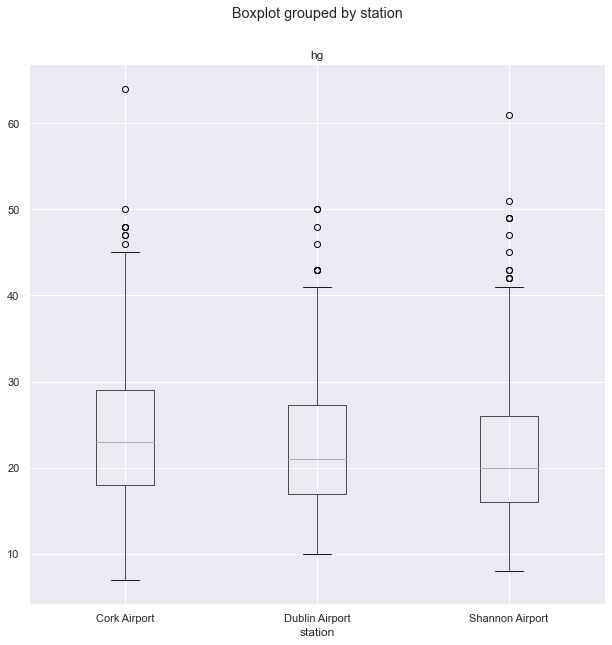

In [143]:
weather.boxplot('hg',by='station')

As we can see from this boxplot, there is a higher number of high gusts in cork airport than dublin and shannon, however shannon has the highest outliers and highest gusts recorded from the 3 stations.

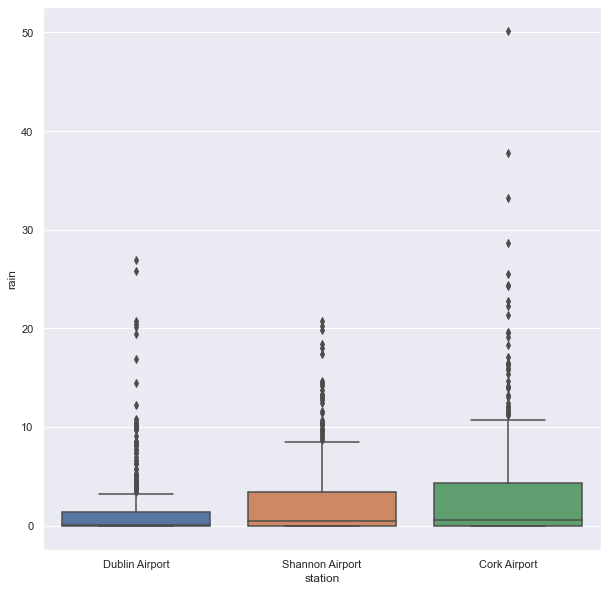

In [144]:
sns.boxplot(x='station', y='rain', data=weather)
plt.show()

It is clear to us here that there is little variation in the amount of rainfall across stations, however cork seems to be more prone to higher rainfall, and indeed the highest recorded rainfall days across the 3 stations.

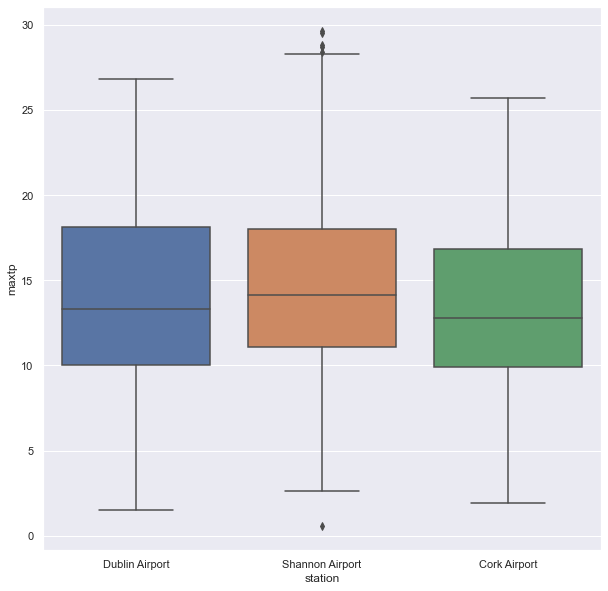

In [145]:
sns.boxplot(x='station', y='maxtp', data=weather)
plt.show()

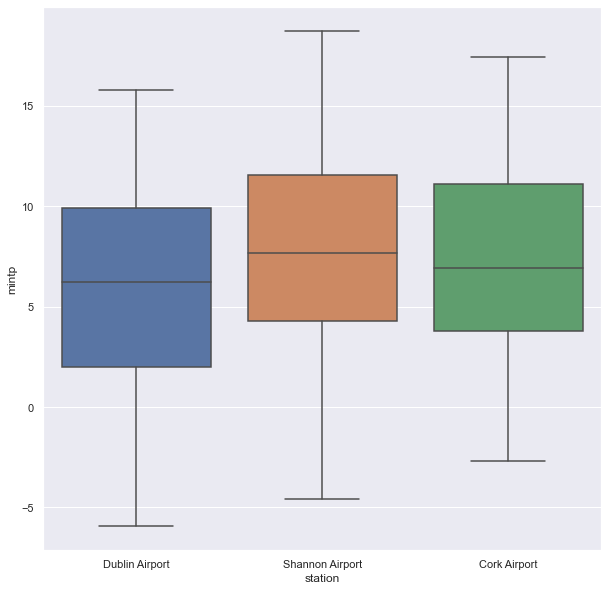

In [146]:
sns.boxplot(x='station', y='mintp', data=weather)
plt.show()

There is little variation across the 3 stations when it comes to temperature, however Dublin seems to have recorded more of and the lowest temperatures when considering minimum temperatures for each days.

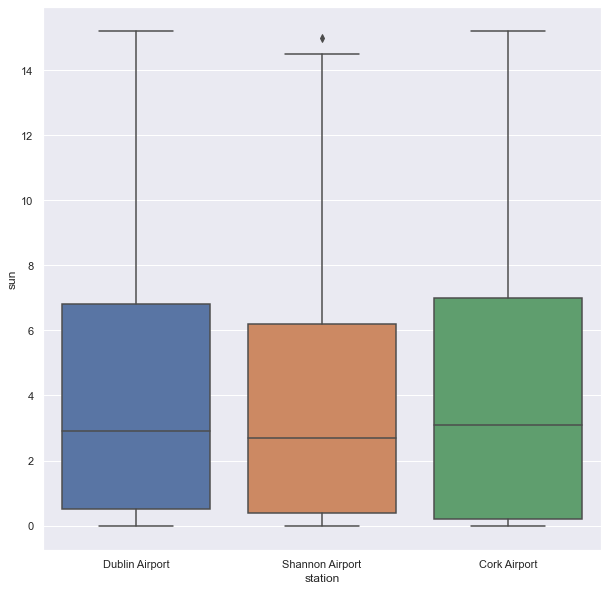

In [147]:
sns.boxplot(x='station', y='sun', data=weather)
plt.show()

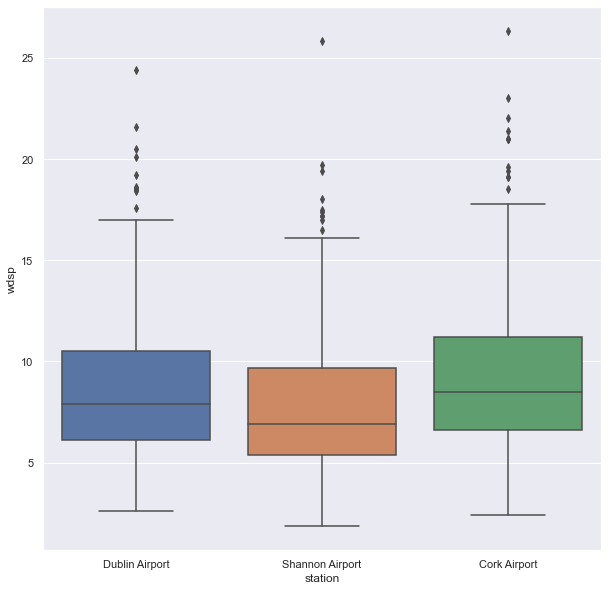

In [148]:
sns.boxplot(x='station', y='wdsp', data=weather)
plt.show()